# Goal
This post aims to compare the performance between `append` and `insert` in Python. The performance comparison is simply done by the piece of code that counts a number, append it to a list, and then reverse it. 

We will see the significant difference between two codes: one using `append` is linear and another using `insert` is quadratic run time growth as below.

<img src=https://user-images.githubusercontent.com/8764683/61996639-3b927300-b04b-11e9-8e16-0174faee2e83.png style='height: 300px'>

**Reference**
* [Python Algorithms: Mastering Basic Algorithms in the Python Language](https://www.amazon.com/Python-Algorithms-Mastering-Basic-Language/dp/148420056X/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=4JW2REKWW17KPCWM5N7F)



# Libraries

In [26]:
from timeit import Timer
import pandas as pd
%matplotlib inline

# Append

In [6]:
count = 10**5

In [9]:
def count_by_append(count):
    nums = []
    for i in range(count):
        nums.append(i)
    nums.reverse()
count_by_append(count)

The execution time is 22ms

# Insert

In [10]:
def count_by_insert(count):
    nums = []
    for i in range(count):
        nums.insert(0, i)
count_by_insert(count)      

The execution time is 3.53s

# Comparison

In [24]:
counts = [10 ** i for i in range(5)]
time_by_append = []
time_by_insert = []

for count in counts:
    print(f'Processing {count}')
    t = Timer(lambda: count_by_append(count))
    time_by_append.append(t.timeit(number=10))
    t = Timer(lambda: count_by_insert(count))
    time_by_insert.append(t.timeit(number=10))

df_performance = pd.DataFrame({'count': counts,
                               'count_by_append': time_by_append,
                               'count_by_insert': time_by_insert})
df_performance

Processing 1
Processing 10
Processing 100
Processing 1000
Processing 10000


,count,count_by_append,count_by_insert
0,1,0.000013,0.000011
1,10,0.000019,0.000027
2,100,0.000107,0.000227
3,1000,0.000927,0.005318
4,10000,0.009438,0.379457


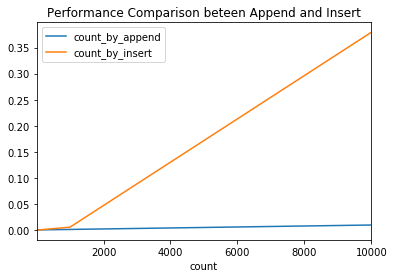

In [34]:
# Plot the performance difference
df_performance.set_index('count').plot(title='Performance Comparison beteen Append and Insert');